# Exp 8 :

We’re using a Unlabeled data set from “Bag of Words Meets Bags of Popcorn” available on Kaggle : https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [ ]:
#Import packages
import pandas as pd
import gensim
#import beautiful soup , regex
from bs4 import BeautifulSoup
import re, string

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=2,size=5)
# summarize the loaded model
print(model)


Word2Vec(vocab=4, size=5, alpha=0.025)


In [ ]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['this'])


['this', 'is', 'the', 'sentence']
[-0.05836258  0.03466232 -0.0747008  -0.05012784  0.08845659]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=4, size=5, alpha=0.025)


In [ ]:
model.wv.similarity("this","is")

0.10749495

In [ ]:
model.wv.most_similar("this")

[('is', 0.10749495774507523),
 ('sentence', 0.0753842145204544),
 ('the', -0.22605973482131958)]

In [ ]:
X = model[model.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


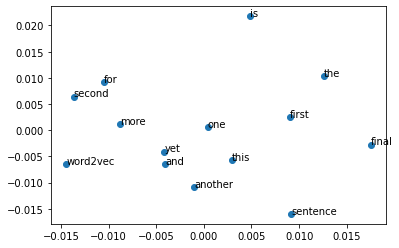

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=3)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

##Part A:-
Implement Word2Vec skip-gram model and solve analogical reasoning problem which essentially requires asking the question: "Germany is to Berlin as France is to ___?".



In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
vec_king = wv['king']

In [ ]:
try:
    vec_cameroon = wv['cameroon']
except KeyError:
    print("The word 'cameroon' does not appear in this model")

The word 'cameroon' does not appear in this model


In [ ]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [ ]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))


[('SUV', 0.853219211101532), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.756571888923645)]


In [ ]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [ ]:
import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences)

In [ ]:
import tempfile

with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name
    model.save(temporary_filepath)
    #
    # The model is now safely stored in the filepath.
    # You can copy it to other machines, share it with others, etc.
    #
    # To load a saved model:
    #
    new_model = gensim.models.Word2Vec.load(temporary_filepath)

In [ ]:
# model = gensim.models.KeyedVectors.load_word2vec_format('/tmp/vectors.txt', binary=False)
# # using gzipped/bz2 input works too, no need to unzip
# model = gensim.models.KeyedVectors.load_word2vec_format('/tmp/vectors.bin.gz', binary=True)

In [ ]:
model = gensim.models.Word2Vec(sentences, min_count=10)

In [ ]:
# default value of workers=3 (tutorial says 1...)
model = gensim.models.Word2Vec(sentences, workers=4)

In [ ]:
model.wv.evaluate_word_analogies(datapath('questions-words.txt'))

(0.0,
 [{'correct': [], 'incorrect': [], 'section': 'capital-common-countries'},
  {'correct': [], 'incorrect': [], 'section': 'capital-world'},
  {'correct': [], 'incorrect': [], 'section': 'currency'},
  {'correct': [], 'incorrect': [], 'section': 'city-in-state'},
  {'correct': [],
   'incorrect': [('HE', 'SHE', 'HIS', 'HER'), ('HIS', 'HER', 'HE', 'SHE')],
   'section': 'family'},
  {'correct': [], 'incorrect': [], 'section': 'gram1-adjective-to-adverb'},
  {'correct': [], 'incorrect': [], 'section': 'gram2-opposite'},
  {'correct': [], 'incorrect': [], 'section': 'gram3-comparative'},
  {'correct': [],
   'incorrect': [('BIG', 'BIGGEST', 'GOOD', 'BEST'),
    ('GOOD', 'BEST', 'BIG', 'BIGGEST')],
   'section': 'gram4-superlative'},
  {'correct': [],
   'incorrect': [('GO', 'GOING', 'LOOK', 'LOOKING'),
    ('GO', 'GOING', 'RUN', 'RUNNING'),
    ('GO', 'GOING', 'SAY', 'SAYING'),
    ('LOOK', 'LOOKING', 'RUN', 'RUNNING'),
    ('LOOK', 'LOOKING', 'SAY', 'SAYING'),
    ('LOOK', 'LOOKING',

Implement CBOW and skip gram model for word embedding and print similarity between two word.

In [ ]:
# Python program to implement CBOW and skip gram model for word embedding and print similarity between two word
import nltk
nltk.download('punkt')


# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

s='''Alice's Adventures in Wonderland (commonly Alice in Wonderland) is an 1865 English children's tale by Lewis Carroll (a pseudonym of Charles Dodgson).[1] A young girl named Alice falls through a rabbit hole into a fantasy world of anthropomorphic creatures. It is seen as a prime example of the literary nonsense genre.[2][3] Its play with logic gives the story lasting popularity with adults as well as children.[2]

One of the best-known works of Victorian English fiction, its narrative, structure, characters and imagery have had huge influence on popular culture and literature, especially in the fantasy genre.[3][4][5] The book has never been out of print and has been translated into at least 97 languages.[6] Its legacy covers adaptations for stage, screen, radio, art, ballet, theme parks, board games and video games.[7] Carroll published a sequel in 1871 entitled Through the Looking-Glass and a shortened version for young children, The Nursery "Alice", in 1890'''

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
	temp = []
	
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())

	data.append(temp)

# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1,
							size = 100, window = 5)

# Print results
print("Cosine similarity between 'alice' " +
			"and 'wonderland' - CBOW : ",
	model1.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
				"and 'story' - CBOW : ",
	model1.similarity('alice', 'story'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100,
											window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " +
		"and 'wonderland' - Skip Gram : ",
	model2.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ",
	model2.similarity('alice', 'story'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.18161805
Cosine similarity between 'alice' and 'story' - CBOW :  0.17034699
Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.18395017
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.18169542


### Q. List out applications of word embedding:

**Applications of Word Embedding :**
- Sentiment Analysis
- Speech Recognition
- Information Retrieval
- Question Answering

# Part B:- 
Develop any one application like text classification , sentiment classification using word2vec model

## **Recommendation System**

In [ ]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OnlineRetail.csv', header= 0,encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# remove missing values
df.dropna(inplace=True)

df['StockCode']= df['StockCode'].astype(str)

customers = df["CustomerID"].unique().tolist()
len(customers)

4372

In [ ]:
# shuffle customer ID's
random.shuffle(customers)

# extract 90% of customer ID's
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]

# split data into train and validation set
train_df = df[df['CustomerID'].isin(customers_train)]
validation_df = df[~df['CustomerID'].isin(customers_train)]

# list to capture purchase history of the customers
purchases_train = []

# populate the list with the product codes
for i in tqdm(customers_train):
    temp = train_df[train_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)

100%|██████████| 3935/3935 [00:05<00:00, 723.52it/s]


In [ ]:
# list to capture purchase history of the customers
purchases_val = []

# populate the list with the product codes
for i in tqdm(validation_df['CustomerID'].unique()):
    temp = validation_df[validation_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_val.append(temp)


# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

100%|██████████| 437/437 [00:00<00:00, 1130.60it/s]


(3703765, 3739990)

In [ ]:
model.init_sims(replace=True)

In [ ]:
print(model)

Word2Vec(vocab=3177, size=100, alpha=0.03)


In [ ]:
# extract all vectors
X = model[model.wv.vocab]

X.shape

(3177, 100)

In [ ]:
!pip install numpy==1.20
!pip install umap-learn

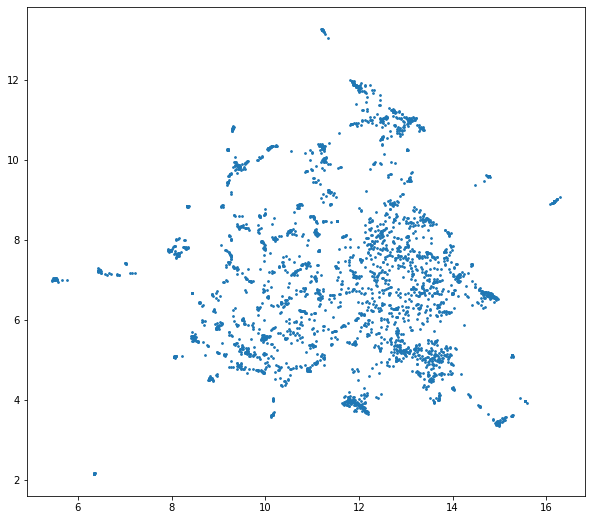

In [ ]:
#visualizing
import umap.umap_ as umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [ ]:
!pip uninstall umap
!pip install umap-learn

In [ ]:
products = train_df[["StockCode", "Description"]]

# remove duplicates
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")

# create product-ID and product-description dictionary
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [ ]:
# test the dictionary
products_dict['84029E']

['RED WOOLLY HOTTIE WHITE HEART.']

In [ ]:
def similar_products(v, n = 6):
    
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms   

In [ ]:
#recomending similar products to 84029G	KNITTED UNION FLAG HOT WATER BOTTLE
similar_products(model['84029G'])

[('RED WOOLLY HOTTIE WHITE HEART.', 0.811159610748291),
 ('SCOTTIE DOG HOT WATER BOTTLE', 0.7328979969024658),
 ('ENGLISH ROSE HOT WATER BOTTLE', 0.710967481136322),
 ('WHITE SKULL HOT WATER BOTTLE ', 0.6879210472106934),
 ('RETROSPOT HEART HOT WATER BOTTLE', 0.6830090284347534),
 ('HOT WATER BOTTLE I AM SO POORLY', 0.6753029823303223)]

In [ ]:
#recomending similar products to 85123A	WHITE HANGING HEART T-LIGHT HOLDER
similar_products(model['85123A'])

[('PINK HANGING HEART T-LIGHT HOLDER', 0.6924987435340881),
 ('RED HANGING HEART T-LIGHT HOLDER', 0.663631796836853),
 ('T-LIGHT HOLDER SWEETHEART HANGING', 0.6292834281921387),
 ('LOVE BUILDING BLOCK WORD', 0.612830400466919),
 ('CREAM HEART CARD HOLDER', 0.6106171607971191),
 ('WOODEN PICTURE FRAME WHITE FINISH', 0.6064338088035583)]